# Classical Mechanics Problem 1.50

Problem Statement: The differential equation (1.51) for the skateboard of Example 1.2 cannot be solved in terms of elementary functions, but it is easily solved numerically. 

$$
\ddot{\phi} = -{g \over R} sin(\phi)
$$

## Imports

In this python program, we need numpy, scipy, matplotlib, and math modules.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

## Setting up a system of equations

Because this is a second order differential equation, in order to set up a system of equations for solving, you must define a new variable for angular velocity. Thus the new system of equations would be:

$$
\dot{\phi} = \omega
$$
$$
\dot{\omega} = -{g \over R} sin(\phi)
$$

The `xv` variable is a list containing both the $\phi$ and $\omega$ variables. (I had to use x and v instead because it was easier to type)

In [2]:
def model(xv, t, g, R):
    x, v = xv
    dxdt = v
    dvdt =  (-g/R) * math.sin(x)
    return [dxdt, dvdt]

## Initial Values

As given by the problem, the initial values are recorded below.

In [3]:
x0 = [math.radians(20), 0]
g = 9.8
R = 5

## Time points

This following code defines time points for numerically calculating the timepoints. The `linspace()` function creates an array containing $100$ time points from $t=0$ to $t=10$. To increase accuracy, you can increase the frequency of time points in the interval. For example, we should expect that `t = np.linespace(0, 10, 1000)` would produce far more accurate results. 

In [4]:
t = np.linspace(0, 10, 100)

## Solving the system

The `odeint()` function solves the system at the time points and returns the values of $\phi$ and $\omega$ at each one. 

In [5]:
solution = odeint(model, x0, t, args=(g, R))

## Separating the solutions

Using python array syntax, extract the solutions for $\phi (t)$ and $\omega (t) $

In [6]:
x = solution[:, 0]
v = solution[:, 1]

## Plot $\phi (t)$ and $\omega (t)$ 

Use matlib plotting features to plot both curves onto a graph. 

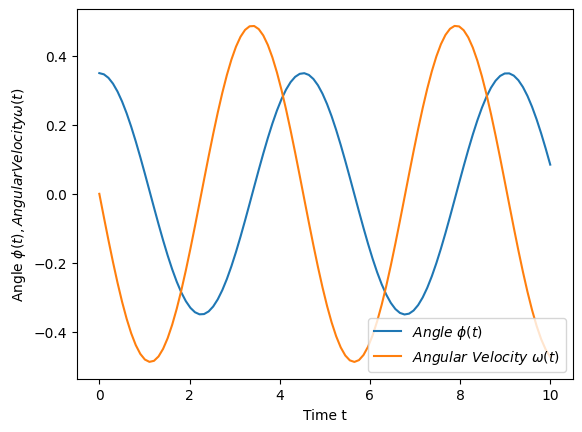

In [7]:
plt.plot(t, x, label=r'$Angle\ \phi(t)$')
plt.plot(t, v, label=r'$Angular\ Velocity\ \omega(t)$')
plt.xlabel('Time t')
plt.ylabel(r'Angle $\phi(t), Angular Velocity \omega(t)$')
plt.legend()
plt.show()

## Computing the approximate solution

In the textbook, equation 1.57 was derived as an approximate solution for this problem. 

$$
\phi (t) = \phi_0 cos (\omega t)
$$

Where $\omega$ is defined as

$$
\omega = \sqrt{g \over R}
$$

In the following graph, I will compare my numerical solution to the approximate solution from the textbook. I can define a new curve, `x_approx()`, following a similar method as before.

In [8]:
def x_approx(t, x0, g, R):
    return x0[0] * np.cos(math.sqrt(g/R) * t) 

t_approx = np.linspace(0, 10, 100)

x_approx_line = x_approx(t_approx, x0, g, R)

## Comparing the approximate solution

Now to compare the plots. As seen below, the two lines are significantly similar. The discrepency increases with t, but we could reasonably use the approximated function for a limited domain of t. 

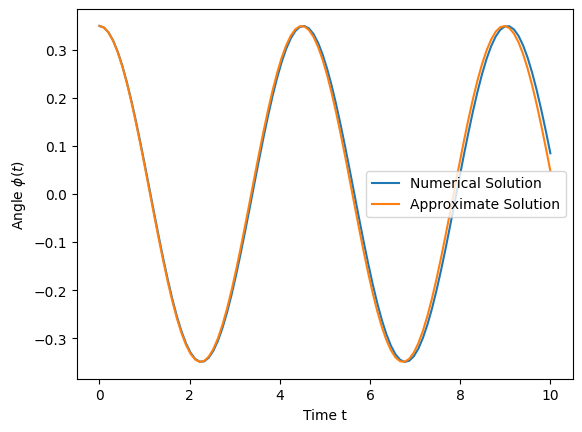

In [9]:
plt.plot(t, x, label='Numerical Solution')
plt.plot(t, x_approx_line, label='Approximate Solution')
plt.xlabel('Time t')
plt.ylabel(r'Angle $\phi(t)$')
plt.legend()
plt.show()

## Conclusion

The approximate solution from the textbook and the numerical solution of the second order differential equation are well aligned, at least for the first few seconds after release. Since the derivation of the approximate solution was assuming that $ \phi \approx sin(\phi) $, the approximation should be more accurate for smaller $\phi$. However, even at $\phi_0 = 20 \textdegree$, the approximate solution seems to do the job pretty well.